# As a data scientist at the Bureau of Meteorology, you are tasked with creating a fully-automated system that can use today's weather data for a given location to predict whether it will rain at the location tomorrow.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!pip install virtualenv
#!virtualenv /content/drive/MyDrive/virtual_env
!source /content/drive/MyDrive/virtual_env/bin/activate
#!pip install opendatasets --quiet
#!pip list


In [ ]:
# import opendatasets as od
# dataset_url = 'https://www.kaggle.com/jsphyg/weather-dataset-rattle-package'
# od.download(dataset_url)

In [ ]:

train_csv='/content/drive/MyDrive/weather-dataset-rattle-package/weatherAUS.csv'

In [ ]:

import pandas as pd

In [ ]:
raw_df=pd.read_csv(train_csv)

In [ ]:
raw_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   
145459       NaN         NaN            NaN        ESE  ...        62.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   
145459         36.0       1020.2       1017.9       8.0       8.0     15.0   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  
145459     20.9         No           NaN  

[145460 rows x 23 columns]

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
#dropna() method drops the rows with missing values
raw_df.dropna(subset=['RainToday','RainTomorrow'],inplace=True)

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null   fl

In [ ]:
# !pip install matplotlib plotly seaborn --quiet

import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**Exploratory Data Analysis and VisualizationS**

In [ ]:

fig=px.histogram(raw_df,x='Location',title='Location vs Rain Today',color='RainToday')
fig.show()

In [ ]:
raw_df.Location.nunique()#gives the unique values

49

In [ ]:
fig=px.histogram(raw_df,x="Temp3pm",title="Temperature at 3pm vs RainTomorrow",color='RainTomorrow')
fig.show()

In [ ]:
fig=px.histogram(raw_df,x='RainTomorrow',title='RainTomorrow vs RainToday',color='RainToday')
fig.show()

In [ ]:
fig=px.scatter(raw_df,#can also use a sample from the dataframe using raw_df.sample(n)
               title='MinTemp vs MaxTemp',
               x='MinTemp',
               y='MaxTemp',
               color='RainToday')
fig.show()

In [ ]:
 #!pip install jovian

In [ ]:
# import jovian
# jovian.commit()

In [ ]:
raw_df.dropna(subset=['Sunshine'],inplace=True)
raw_df


Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
6049    2009-01-01    Cobar     17.9     35.2       0.0         12.0   
6050    2009-01-02    Cobar     18.4     28.9       0.0         14.8   
6051    2009-01-03    Cobar     15.5     34.1       0.0         12.6   
6052    2009-01-04    Cobar     19.4     37.6       0.0         10.8   
6053    2009-01-05    Cobar     21.9     38.4       0.0         11.4   
...            ...      ...      ...      ...       ...          ...   
142298  2017-06-20   Darwin     19.3     33.4       0.0          6.0   
142299  2017-06-21   Darwin     21.2     32.6       0.0          7.6   
142300  2017-06-22   Darwin     20.7     32.8       0.0          5.6   
142301  2017-06-23   Darwin     19.5     31.8       0.0          6.2   
142302  2017-06-24   Darwin     20.2     31.7       0.0          5.6   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
6049        12.3         SSW           48.0        ENE  ...        20.0   
6050        13.0           S           37.0        SSE  ...        30.0   
6051        13.3          SE           30.0        NaN  ...         NaN   
6052        10.6         NNE           46.0        NNE  ...        42.0   
6053        12.2         WNW           31.0        WNW  ...        37.0   
...          ...         ...            ...        ...  ...         ...   
142298      11.0         ENE           35.0         SE  ...        63.0   
142299       8.6           E           37.0         SE  ...        56.0   
142300      11.0           E           33.0          E  ...        46.0   
142301      10.6         ESE           26.0         SE  ...        62.0   
142302      10.7         ENE           30.0        ENE  ...        73.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
6049           13.0       1006.3       1004.4       2.0       5.0     26.6   
6050            8.0       1012.9       1012.1       1.0       1.0     20.3   
6051            7.0          NaN       1011.6       NaN       1.0      NaN   
6052           22.0       1012.3       1009.2       1.0       6.0     28.7   
6053           22.0       1012.7       1009.1       1.0       5.0     29.1   
...             ...          ...          ...       ...       ...      ...   
142298         32.0       1013.9       1010.5       0.0       1.0     24.5   
142299         28.0       1014.6       1011.2       7.0       0.0     24.8   
142300         23.0       1015.3       1011.8       0.0       0.0     24.8   
142301         58.0       1014.9       1010.7       1.0       1.0     24.8   
142302         32.0       1013.9       1009.7       6.0       5.0     25.4   

        Temp3pm  RainToday  RainTomorrow  
6049       33.4         No            No  
6050       27.0         No            No  
6051       32.7         No            No  
6052       34.9         No            No  
6053       35.6         No            No  
...         ...        ...           ...  
142298     32.3         No            No  
142299     32.0         No            No  
142300     32.1         No            No  
142301     29.2         No            No  
142302     31.0         No            No  

[73982 rows x 23 columns]

In [ ]:
 fig=px.histogram(raw_df,x='Sunshine',title='Sunshine vs RainToday',color='RainToday')
 fig.show()


**We can see that whenever there is less sunshine it tends to rain which is obvious tbh**

In [ ]:
 raw_df.dropna(subset=['Pressure9am','Pressure3pm'],inplace=True)

In [ ]:
 fig=px.scatter(raw_df,
                x='Pressure9am',
                y='Pressure3pm',
                title='Pressure9am vs Pressure3pm',
                color='RainToday'
                )
 fig.update_traces(marker_size=4)
 fig.show()


In [ ]:
from sklearn.model_selection import train_test_split
raw_df=pd.read_csv(train_csv)

In [ ]:
test_val_df,test_df=train_test_split(raw_df,test_size=0.2,random_state=42)
train_df,val_df=train_test_split(test_val_df,test_size=0.25,random_state=42)

In [ ]:
print("Train Set shape",train_df.shape)
print("Validation Set shape",val_df.shape)
print("Test Set shape",test_df.shape)

Train Set shape (87276, 23)
Validation Set shape (29092, 23)
Test Set shape (29092, 23)


In [ ]:
input_cols=list(train_df.columns)[1:-1]
target_cols='RainTomorrow'

In [ ]:
train_input=train_df[input_cols].copy()
train_target=train_df[target_cols].copy()
val_input=val_df[input_cols].copy()
val_target=val_df[target_cols].copy()
test_input=test_df[input_cols].copy()
test_target=test_df[target_cols].copy()


In [ ]:
import numpy as np

In [ ]:
numeric_cols=train_input.select_dtypes(include=np.number).columns.tolist()
categorical_cols=train_input.select_dtypes(include='object').columns.tolist()

In [ ]:
numeric_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [ ]:
categorical_cols


['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [ ]:
train_input[numeric_cols].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  86406.000000  86527.000000  85331.000000  49389.000000  45227.000000   
mean      12.185066     23.207290      2.381887      5.469226      7.613459   
std        6.406334      7.119747      8.548093      4.183157      3.785097   
min       -8.500000     -4.800000      0.000000      0.000000      0.000000   
25%        7.600000     17.900000      0.000000      2.600000      4.900000   
50%       12.000000     22.600000      0.000000      4.800000      8.400000   
75%       16.800000     28.200000      0.800000      7.400000     10.600000   
max       31.900000     47.300000    371.000000     86.200000     14.300000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   81148.000000  86222.000000  85452.000000  85673.000000  84542.000000   
mean       40.037352     14.049593     18.643215     68.893257     51.527205   
std        13.667311      8.931923      8.824493     18.989543     20.753179   
min         7.000000      0.000000      0.000000      1.000000      0.000000   
25%        31.000000      7.000000     13.000000     57.000000     37.000000   
50%        39.000000     13.000000     19.000000     70.000000     52.000000   
75%        48.000000     19.000000     24.000000     83.000000     66.000000   
max       135.000000    130.000000     87.000000    100.000000    100.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  78170.000000  78190.000000  53570.000000  51415.000000  86225.000000   
mean    1017.645841   1015.256262      4.454583      4.507751     16.980002   
std        7.112176      7.040140      2.886524      2.719189      6.495116   
min      980.500000    978.200000      0.000000      0.000000     -7.200000   
25%     1012.900000   1010.400000      1.000000      2.000000     12.300000   
50%     1017.700000   1015.200000      5.000000      5.000000     16.700000   
75%     1022.400000   1020.000000      7.000000      7.000000     21.500000   
max     1041.000000   1038.900000      9.000000      9.000000     40.200000   

            Temp3pm  
count  85099.000000  
mean      21.669539  
std        6.933513  
min       -5.400000  
25%       16.600000  
50%       21.100000  
75%       26.400000  
max       46.200000

In [ ]:
train_input[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

# **Imputing**

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer=SimpleImputer(strategy='mean')

In [ ]:
help(SimpleImputer)

Help on class SimpleImputer in module sklearn.impute._base:

class SimpleImputer(_BaseImputer)
 |  SimpleImputer(*, missing_values=nan, strategy='mean', fill_value=None, copy=True, add_indicator=False, keep_empty_features=False)
 |  
 |  Univariate imputer for completing missing values with simple strategies.
 |  
 |  Replace missing values using a descriptive statistic (e.g. mean, median, or
 |  most frequent) along each column, or using a constant value.
 |  
 |  Read more in the :ref:`User Guide <impute>`.
 |  
 |  .. versionadded:: 0.20
 |     `SimpleImputer` replaces the previous `sklearn.preprocessing.Imputer`
 |     estimator which is now removed.
 |  
 |  Parameters
 |  ----------
 |  missing_values : int, float, str, np.nan, None or pandas.NA, default=np.nan
 |      The placeholder for the missing values. All occurrences of
 |      `missing_values` will be imputed. For pandas' dataframes with
 |      nullable integer dtypes with missing values, `missing_values`
 |      can be 

In [ ]:
raw_df[numeric_cols].isna().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
dtype: int64

In [ ]:
imputer.fit(raw_df[numeric_cols])

SimpleImputer()

In [ ]:
imputer.statistics_

array([  12.19403438,   23.22134828,    2.36091815,    5.46823152,
          7.61117752,   40.03523007,   14.04342591,   18.66265678,
         68.88083134,   51.53911588, 1017.6499398 , 1015.25588883,
          4.44746126,    4.50993008,   16.99063142,   21.68339032])

In [ ]:
imputer.transform(raw_df[numeric_cols])

array([[13.4       , 22.9       ,  0.6       , ...,  4.50993008,
        16.9       , 21.8       ],
       [ 7.4       , 25.1       ,  0.        , ...,  4.50993008,
        17.2       , 24.3       ],
       [12.9       , 25.7       ,  0.        , ...,  2.        ,
        21.        , 23.2       ],
       ...,
       [ 5.4       , 26.9       ,  0.        , ...,  4.50993008,
        12.5       , 26.1       ],
       [ 7.8       , 27.        ,  0.        , ...,  2.        ,
        15.1       , 26.        ],
       [14.9       , 23.22134828,  0.        , ...,  8.        ,
        15.        , 20.9       ]])

**Imputer.transform gives a numpy array of the columns after imputing .now have to overwrite it in the train,val,test inputs**


In [ ]:
# train_input[numeric_cols]
train_input[numeric_cols]=imputer.transform(train_input[numeric_cols])
val_input[numeric_cols]=imputer.transform(val_input[numeric_cols])
test_input[numeric_cols]=imputer.transform(test_input[numeric_cols])


In [ ]:
train_input[numeric_cols]

MinTemp  MaxTemp  Rainfall  Evaporation   Sunshine  WindGustSpeed  \
101492  12.000000     13.9  1.200000     2.400000   0.100000       85.00000   
116073   9.700000     27.9  0.000000     5.468232  11.200000       35.00000   
118641  10.500000     21.8  1.600000     5.200000  10.600000       37.00000   
138836  19.800000     24.9  0.000000     5.468232   7.611178       48.00000   
77431   12.900000     27.6  0.200000     8.400000  13.400000       31.00000   
...           ...      ...       ...          ...        ...            ...   
124349  12.194034     16.5  2.360918     5.468232   7.611178       26.00000   
79732   12.800000     19.7  0.000000     6.600000   7.000000       39.00000   
98679   16.200000     24.8  0.000000     5.468232   7.611178       28.00000   
17063    5.100000     19.2  0.100000     5.468232   7.611178       40.03523   
108513  10.900000     19.6  0.000000     3.200000   7.611178       24.00000   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
101492          54.0          39.0         70.0         57.0    994.40000   
116073          11.0          24.0         59.0         38.0   1020.40000   
118641           9.0          19.0         55.0         39.0   1017.80000   
138836          20.0           6.0         34.0         52.0   1011.30000   
77431           13.0          19.0         78.0         55.0   1017.30000   
...              ...           ...          ...          ...          ...   
124349           7.0           6.0         72.0         49.0   1017.64994   
79732           17.0          22.0         52.0         45.0   1023.90000   
98679           11.0           9.0         68.0         31.0   1017.70000   
17063            0.0           9.0         96.0         66.0   1017.64994   
108513          15.0           6.0         74.0         46.0   1027.20000   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  
101492   998.100000  7.000000   8.00000     13.9      9.0  
116073  1017.100000  4.447461   4.50993     19.3     25.9  
118641  1017.300000  3.000000   4.00000     18.3     20.9  
138836  1009.000000  8.000000   2.00000     21.1     22.1  
77431   1015.200000  4.447461   4.50993     18.3     24.9  
...             ...       ...       ...      ...      ...  
124349  1015.255889  4.447461   4.50993     10.6     15.0  
79732   1022.700000  7.000000   7.00000     14.6     17.7  
98679   1015.400000  4.447461   4.50993     17.9     24.1  
17063   1015.255889  7.000000   3.00000      8.8     17.5  
108513  1023.700000  5.000000   4.50993     15.6     19.3  

[87276 rows x 16 columns]

In [ ]:
train_input[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

**there are no missing values and is filled with the mean of the column**

In [ ]:
train_input.describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  87276.000000  87276.000000  87276.000000  87276.000000  87276.000000   
mean      12.185155     23.207411      2.381420      5.468794      7.612360   
std        6.374323      7.089130      8.452306      3.146806      2.724747   
min       -8.500000     -4.800000      0.000000      0.000000      0.000000   
25%        7.700000     18.000000      0.000000      4.200000      7.611178   
50%       12.100000     22.700000      0.000000      5.468232      7.611178   
75%       16.800000     28.100000      1.000000      5.468232      8.600000   
max       31.900000     47.300000    371.000000     86.200000     14.300000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   87276.000000  87276.000000  87276.000000  87276.000000  87276.000000   
mean       40.037203     14.049518     18.643621     68.893029     51.527579   
std        13.178755      8.877824      8.731793     18.814342     20.425533   
min         7.000000      0.000000      0.000000      1.000000      0.000000   
25%        31.000000      7.000000     13.000000     57.000000     37.000000   
50%        39.000000     13.000000     18.662657     69.000000     51.539116   
75%        46.000000     19.000000     24.000000     83.000000     65.000000   
max       135.000000    130.000000     87.000000    100.000000    100.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  87276.000000  87276.000000  87276.000000  87276.000000  87276.000000   
mean    1017.646269   1015.256223      4.451832      4.508646     16.980130   
std        6.730927      6.663604      2.261453      2.087062      6.455889   
min      980.500000    978.200000      0.000000      0.000000     -7.200000   
25%     1013.500000   1011.100000      3.000000      4.000000     12.300000   
50%     1017.649940   1015.255889      4.447461      4.509930     16.800000   
75%     1021.800000   1019.400000      6.000000      6.000000     21.500000   
max     1041.000000   1038.900000      9.000000      9.000000     40.200000   

            Temp3pm  
count  87276.000000  
mean      21.669885  
std        6.846492  
min       -5.400000  
25%       16.700000  
50%       21.300000  
75%       26.200000  
max       46.200000

# **Scaling the data **

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [ ]:
scaler.fit(raw_df[numeric_cols])

MinMaxScaler()

In [ ]:
print(numeric_cols)
print(list(scaler.data_min_))
print(list(scaler.data_max_))

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
[-8.5, -4.8, 0.0, 0.0, 0.0, 6.0, 0.0, 0.0, 0.0, 0.0, 980.5, 977.1, 0.0, 0.0, -7.2, -5.4]
[33.9, 48.1, 371.0, 145.0, 14.5, 135.0, 130.0, 87.0, 100.0, 100.0, 1041.0, 1039.6, 9.0, 9.0, 40.2, 46.7]


In [ ]:
train_input[numeric_cols]

MinTemp  MaxTemp  Rainfall  Evaporation   Sunshine  WindGustSpeed  \
101492  12.000000     13.9  1.200000     2.400000   0.100000       85.00000   
116073   9.700000     27.9  0.000000     5.468232  11.200000       35.00000   
118641  10.500000     21.8  1.600000     5.200000  10.600000       37.00000   
138836  19.800000     24.9  0.000000     5.468232   7.611178       48.00000   
77431   12.900000     27.6  0.200000     8.400000  13.400000       31.00000   
...           ...      ...       ...          ...        ...            ...   
124349  12.194034     16.5  2.360918     5.468232   7.611178       26.00000   
79732   12.800000     19.7  0.000000     6.600000   7.000000       39.00000   
98679   16.200000     24.8  0.000000     5.468232   7.611178       28.00000   
17063    5.100000     19.2  0.100000     5.468232   7.611178       40.03523   
108513  10.900000     19.6  0.000000     3.200000   7.611178       24.00000   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
101492          54.0          39.0         70.0         57.0    994.40000   
116073          11.0          24.0         59.0         38.0   1020.40000   
118641           9.0          19.0         55.0         39.0   1017.80000   
138836          20.0           6.0         34.0         52.0   1011.30000   
77431           13.0          19.0         78.0         55.0   1017.30000   
...              ...           ...          ...          ...          ...   
124349           7.0           6.0         72.0         49.0   1017.64994   
79732           17.0          22.0         52.0         45.0   1023.90000   
98679           11.0           9.0         68.0         31.0   1017.70000   
17063            0.0           9.0         96.0         66.0   1017.64994   
108513          15.0           6.0         74.0         46.0   1027.20000   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  
101492   998.100000  7.000000   8.00000     13.9      9.0  
116073  1017.100000  4.447461   4.50993     19.3     25.9  
118641  1017.300000  3.000000   4.00000     18.3     20.9  
138836  1009.000000  8.000000   2.00000     21.1     22.1  
77431   1015.200000  4.447461   4.50993     18.3     24.9  
...             ...       ...       ...      ...      ...  
124349  1015.255889  4.447461   4.50993     10.6     15.0  
79732   1022.700000  7.000000   7.00000     14.6     17.7  
98679   1015.400000  4.447461   4.50993     17.9     24.1  
17063   1015.255889  7.000000   3.00000      8.8     17.5  
108513  1023.700000  5.000000   4.50993     15.6     19.3  

[87276 rows x 16 columns]

In [ ]:
train_input[numeric_cols]=scaler.transform(train_input[numeric_cols])
val_input[numeric_cols]=scaler.transform(val_input[numeric_cols])
test_input[numeric_cols]=scaler.transform(test_input[numeric_cols])

In [ ]:
train_input[numeric_cols].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  87276.000000  87276.000000  87276.000000  87276.000000  87276.000000   
mean       0.487857      0.529441      0.006419      0.037716      0.524990   
std        0.150338      0.134010      0.022782      0.021702      0.187914   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.382075      0.431002      0.000000      0.028966      0.524909   
50%        0.485849      0.519849      0.000000      0.037712      0.524909   
75%        0.596698      0.621928      0.002695      0.037712      0.593103   
max        0.952830      0.984877      1.000000      0.594483      0.986207   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   87276.000000  87276.000000  87276.000000  87276.000000  87276.000000   
mean        0.263854      0.108073      0.214294      0.688930      0.515276   
std         0.102161      0.068291      0.100365      0.188143      0.204255   
min         0.007752      0.000000      0.000000      0.010000      0.000000   
25%         0.193798      0.053846      0.149425      0.570000      0.370000   
50%         0.255814      0.100000      0.214513      0.690000      0.515391   
75%         0.310078      0.146154      0.275862      0.830000      0.650000   
max         1.000000      1.000000      1.000000      1.000000      1.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  87276.000000  87276.000000  87276.000000  87276.000000  87276.000000   
mean       0.613988      0.610500      0.494648      0.500961      0.510129   
std        0.111255      0.106618      0.251273      0.231896      0.136200   
min        0.000000      0.017600      0.000000      0.000000      0.000000   
25%        0.545455      0.544000      0.333333      0.444444      0.411392   
50%        0.614049      0.610494      0.494162      0.501103      0.506329   
75%        0.682645      0.676800      0.666667      0.666667      0.605485   
max        1.000000      0.988800      1.000000      1.000000      1.000000   

            Temp3pm  
count  87276.000000  
mean       0.519576  
std        0.131411  
min        0.000000  
25%        0.424184  
50%        0.512476  
75%        0.606526  
max        0.990403

# Encoding Categorical Data

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse=False,handle_unknown='ignore')#sparse false means do not create a sparse matrix but create a numpy array
#and handle_unknown ='ignore' if there is a category that it hasnot seen before ignore

In [ ]:
categorical_cols=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
raw_df2=raw_df[categorical_cols].fillna('Unknown')
encoder.fit(raw_df2[categorical_cols])


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [ ]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'Unknown', 'W', 'WNW', 'WSW'], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'Unknown', 'W', 'WNW', 'WSW'], dtype=

In [ ]:
encoded_categories=list(encoder.get_feature_names_out(categorical_cols))
encoded_categories

['Location_Adelaide',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Penrith',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',
 'Location_Richmond',
 'Location_Sale',
 'Location_SalmonGums',
 'Location_Sydney',
 'Location_SydneyAirport',
 'Location_Townsville',
 'Location_Tuggeranong',
 'Location_Uluru',
 'Location_WaggaWagga',
 'Location_Walpole',
 'Locat

In [ ]:
train_input[encoded_categories]=encoder.transform(train_input[categorical_cols].fillna('Unknown'))
val_input[encoded_categories]=encoder.transform(val_input[categorical_cols].fillna('Unknown'))
test_input[encoded_categories]=encoder.transform(test_input[categorical_cols].fillna('Unknown'))

In [ ]:
train_input

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
101492  MountGambier  0.483491  0.353497  0.003235     0.016552  0.006897   
116073    PearceRAAF  0.429245  0.618147  0.000000     0.037712  0.772414   
118641  PerthAirport  0.448113  0.502836  0.004313     0.035862  0.731034   
138836  AliceSprings  0.667453  0.561437  0.000000     0.037712  0.524909   
77431       Portland  0.504717  0.612476  0.000539     0.057931  0.924138   
...              ...       ...       ...       ...          ...       ...   
124349    SalmonGums  0.488067  0.402647  0.006364     0.037712  0.524909   
79732       Watsonia  0.502358  0.463138  0.000000     0.045517  0.482759   
98679       Adelaide  0.582547  0.559546  0.000000     0.037712  0.524909   
17063      Newcastle  0.320755  0.453686  0.000270     0.037712  0.524909   
108513       Woomera  0.457547  0.461248  0.000000     0.022069  0.524909   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  WindDir3pm_SSE  \
101492         WNW       0.612403        NNW          W  ...             0.0   
116073         SSW       0.224806          S        SSW  ...             0.0   
118641         WSW       0.240310        NNE          W  ...             0.0   
138836         NNW       0.325581        SSW         SW  ...             0.0   
77431          ESE       0.193798          E         SE  ...             0.0   
...            ...            ...        ...        ...  ...             ...   
124349         NNE       0.155039        ENE          N  ...             0.0   
79732            S       0.255814          S        SSW  ...             0.0   
98679          ESE       0.170543        ESE        SSE  ...             1.0   
17063          NaN       0.263839        NaN         SE  ...             0.0   
108513          SE       0.139535         SE        NNW  ...             0.0   

        WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_Unknown  WindDir3pm_W  \
101492             0.0            0.0                 0.0           1.0   
116073             1.0            0.0                 0.0           0.0   
118641             0.0            0.0                 0.0           1.0   
138836             0.0            1.0                 0.0           0.0   
77431              0.0            0.0                 0.0           0.0   
...                ...            ...                 ...           ...   
124349             0.0            0.0                 0.0           0.0   
79732              1.0            0.0                 0.0           0.0   
98679              0.0            0.0                 0.0           0.0   
17063              0.0            0.0                 0.0           0.0   
108513             0.0            0.0                 0.0           0.0   

        WindDir3pm_WNW  WindDir3pm_WSW  RainToday_No  RainToday_Unknown  \
101492             0.0             0.0           0.0                0.0   
116073             0.0             0.0           1.0                0.0   
118641             0.0             0.0           0.0                0.0   
138836             0.0             0.0           1.0                0.0   
77431              0.0             0.0           1.0                0.0   
...                ...             ...           ...                ...   
124349             0.0             0.0           0.0                1.0   
79732              0.0             0.0           1.0                0.0   
98679              0.0             0.0           1.0                0.0   
17063              0.0             0.0           1.0                0.0   
108513             0.0             0.0           1.0                0.0   

        RainToday_Yes  
101492            1.0  
116073            0.0  
118641            1.0  
138836            0.0  
77431             0.0  
...               ...  
124349            0.0  
79732             0.0  
98679             0.0  
17063             0.0  
108513            0.0  

[87276 rows x 124 columns]

# Saving the preproccessed data to disk

In [ ]:
#!pip install pyarrow --quiet

**Saving the data in parquet formart .Parquet is a format for fast and efficient storing of pandas dataframe**

In [ ]:
train_input.to_parquet('train_input.parquet')
val_input.to_parquet('val_input.parquet')
test_input.to_parquet('test_input.parquet')

In [ ]:
%%time
#since target data has only one column so it is a series and not a dataframe convert to df and to parquet
pd.DataFrame(train_target).to_parquet('train_target.parquet')
pd.DataFrame(val_target).to_parquet('val_target.parquet')
pd.DataFrame(test_target).to_parquet('test_target.parquet')

CPU times: user 62.7 ms, sys: 12.6 ms, total: 75.3 ms
Wall time: 93.8 ms


In [ ]:
%%time
train_input=pd.read_parquet('train_input.parquet')
val_input=pd.read_parquet('val_input.parquet')
test_input=pd.read_parquet('test_input.parquet')


CPU times: user 400 ms, sys: 521 ms, total: 921 ms
Wall time: 1.07 s


In [ ]:
%%time
train_target=pd.read_parquet('train_target.parquet').RainTomorrow
val_target=pd.read_parquet('val_target.parquet').RainTomorrow
test_target=pd.read_parquet('test_target.parquet').RainTomorrow


CPU times: user 36.8 ms, sys: 6.59 ms, total: 43.4 ms
Wall time: 48.9 ms


In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
model1=LogisticRegression(solver='liblinear')

In [ ]:
#fill the null values with the most frequent value
train_target = train_target.fillna(train_target.mode()[0])
print(train_target.isnull().sum())  # Check for missing values
print(train_target.apply(type).value_counts())
train_input.drop('RainToday_Unknown',axis=1)
encoded_categories=['Location_Adelaide',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Penrith',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',
 'Location_Richmond',
 'Location_Sale',
 'Location_SalmonGums',
 'Location_Sydney',
 'Location_SydneyAirport',
 'Location_Townsville',
 'Location_Tuggeranong',
 'Location_Uluru',
 'Location_WaggaWagga',
 'Location_Walpole',
 'Location_Watsonia',
 'Location_Williamtown',
 'Location_Witchcliffe',
 'Location_Wollongong',
 'Location_Woomera',
 'WindGustDir_E',
 'WindGustDir_ENE',
 'WindGustDir_ESE',
 'WindGustDir_N',
 'WindGustDir_NE',
 'WindGustDir_NNE',
 'WindGustDir_NNW',
 'WindGustDir_NW',
 'WindGustDir_S',
 'WindGustDir_SE',
 'WindGustDir_SSE',
 'WindGustDir_SSW',
 'WindGustDir_SW',
 'WindGustDir_Unknown',
 'WindGustDir_W',
 'WindGustDir_WNW',
 'WindGustDir_WSW',
 'WindDir9am_E',
 'WindDir9am_ENE',
 'WindDir9am_ESE',
 'WindDir9am_N',
 'WindDir9am_NE',
 'WindDir9am_NNE',
 'WindDir9am_NNW',
 'WindDir9am_NW',
 'WindDir9am_S',
 'WindDir9am_SE',
 'WindDir9am_SSE',
 'WindDir9am_SSW',
 'WindDir9am_SW',
 'WindDir9am_Unknown',
 'WindDir9am_W',
 'WindDir9am_WNW',
 'WindDir9am_WSW',
 'WindDir3pm_E',
 'WindDir3pm_ENE',
 'WindDir3pm_ESE',
 'WindDir3pm_N',
 'WindDir3pm_NE',
 'WindDir3pm_NNE',
 'WindDir3pm_NNW',
 'WindDir3pm_NW',
 'WindDir3pm_S',
 'WindDir3pm_SE',
 'WindDir3pm_SSE',
 'WindDir3pm_SSW',
 'WindDir3pm_SW',
 'WindDir3pm_Unknown',
 'WindDir3pm_W',
 'WindDir3pm_WNW',
 'WindDir3pm_WSW',
 'RainToday_No',
 'RainToday_Unknown',
 'RainToday_Yes']
encoded_categories.remove('RainToday_Unknown')

0
RainTomorrow
<class 'str'>    87276
Name: count, dtype: int64


**Logistic Regression model can take categorical data as target but only takes numerical data as input**

In [ ]:
numeric_cols=['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']
model1.fit(train_input[numeric_cols+encoded_categories],train_target)

LogisticRegression(solver='liblinear')

In [ ]:
print(numeric_cols + encoded_categories)
model1.coef_.tolist()

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_

[[0.9269296839963475,
  -2.6230503547558306,
  2.82205191949016,
  -0.04296877170339816,
  -1.5512959566025788,
  6.353747462460099,
  -0.8905410199384282,
  -1.3285196407247428,
  0.2359252572660718,
  5.719795830730305,
  5.499800975687693,
  -9.216174415061714,
  -0.019347454812947213,
  1.1704818411037279,
  0.49906906631456543,
  1.6450586795463549,
  0.5468531515098352,
  0.09220820834273395,
  0.37789408768044597,
  -0.14488882828521146,
  0.2321654299027159,
  -0.3641876523800066,
  0.13439381642571382,
  0.39867433253393164,
  -0.10073846636764247,
  0.008649445006873667,
  0.14889449511033406,
  -0.06895580857980141,
  0.12464361327574056,
  -0.48070500851641507,
  -0.2390790233072795,
  -0.5424677874757465,
  -0.4667106794893278,
  -0.34358472683828545,
  -0.5422915220669545,
  -0.6022771474652135,
  -0.0846166528724976,
  -0.1571738212251912,
  0.011834696964936808,
  -0.9498204332627093,
  0.09798249633263903,
  -0.1917869220280833,
  -0.49518933788588376,
  -0.42345489413

In [ ]:
weight_df=pd.DataFrame({
    'feature':numeric_cols + encoded_categories,
    'weight':model1.coef_.flatten()#coef_ is a 2d array so need to cconvert ot 1D
})
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)
weight_df

feature    weight
0                      MinTemp  0.926930
1                      MaxTemp -2.623050
2                     Rainfall  2.822052
3                  Evaporation -0.042969
4                     Sunshine -1.551296
5                WindGustSpeed  6.353747
6                 WindSpeed9am -0.890541
7                 WindSpeed3pm -1.328520
8                  Humidity9am  0.235925
9                  Humidity3pm  5.719796
10                 Pressure9am  5.499801
11                 Pressure3pm -9.216174
12                    Cloud9am -0.019347
13                    Cloud3pm  1.170482
14                     Temp9am  0.499069
15                     Temp3pm  1.645059
16           Location_Adelaide  0.546853
17             Location_Albany  0.092208
18             Location_Albury  0.377894
19       Location_AliceSprings -0.144889
20      Location_BadgerysCreek  0.232165
21           Location_Ballarat -0.364188
22            Location_Bendigo  0.134394
23           Location_Brisbane  0.398674
24             Location_Cairns -0.100738
25           Location_Canberra  0.008649
26              Location_Cobar  0.148894
27       Location_CoffsHarbour -0.068956
28           Location_Dartmoor  0.124644
29             Location_Darwin -0.480705
30          Location_GoldCoast -0.239079
31             Location_Hobart -0.542468
32          Location_Katherine -0.466711
33         Location_Launceston -0.343585
34          Location_Melbourne -0.542292
35   Location_MelbourneAirport -0.602277
36            Location_Mildura -0.084617
37              Location_Moree -0.157174
38       Location_MountGambier  0.011835
39        Location_MountGinini -0.949820
40          Location_Newcastle  0.097982
41               Location_Nhil -0.191787
42          Location_NorahHead -0.495189
43      Location_NorfolkIsland -0.423455
44          Location_Nuriootpa  0.030241
45         Location_PearceRAAF  0.086674
46            Location_Penrith  0.384211
47              Location_Perth  0.458880
48       Location_PerthAirport  0.409907
49           Location_Portland -0.050552
50           Location_Richmond  0.138872
51               Location_Sale -0.333329
52         Location_SalmonGums  0.404507
53             Location_Sydney  0.138335
54      Location_SydneyAirport -0.116177
55         Location_Townsville -0.702403
56        Location_Tuggeranong  0.302365
57              Location_Uluru  0.110112
58         Location_WaggaWagga  0.240318
59            Location_Walpole  0.043269
60           Location_Watsonia -0.235092
61        Location_Williamtown -0.061897
62        Location_Witchcliffe  0.525630
63         Location_Wollongong -0.834683
64            Location_Woomera -0.331190
65               WindGustDir_E -0.191069
66             WindGustDir_ENE -0.218490
67             WindGustDir_ESE -0.057763
68               WindGustDir_N -0.189167
69              WindGustDir_NE -0.335432
70             WindGustDir_NNE -0.350535
71             WindGustDir_NNW -0.196723
72              WindGustDir_NW -0.207800
73               WindGustDir_S -0.102607
74              WindGustDir_SE -0.050409
75             WindGustDir_SSE -0.124326
76             WindGustDir_SSW -0.138710
77              WindGustDir_SW -0.106985
78         WindGustDir_Unknown -0.405604
79               WindGustDir_W -0.247681
80             WindGustDir_WNW -0.260723
81             WindGustDir_WSW -0.231714
82                WindDir9am_E -0.305856
83              WindDir9am_ENE -0.111599
84              WindDir9am_ESE -0.350558
85                WindDir9am_N -0.032289
86               WindDir9am_NE -0.110877
87              WindDir9am_NNE  0.105423
88              WindDir9am_NNW -0.171911
89               WindDir9am_NW -0.099802
90                WindDir9am_S -0.420064
91               WindDir9am_SE -0.368553
92              WindDir9am_SSE -0.418504
93              WindDir9am_SSW -0.248668
94               WindDir9am_SW -0.183638
95          WindDir9am_Unknown -0.336922
96                WindDir9am_W -0.134402
97   

<Axes: xlabel='weight', ylabel='feature'>

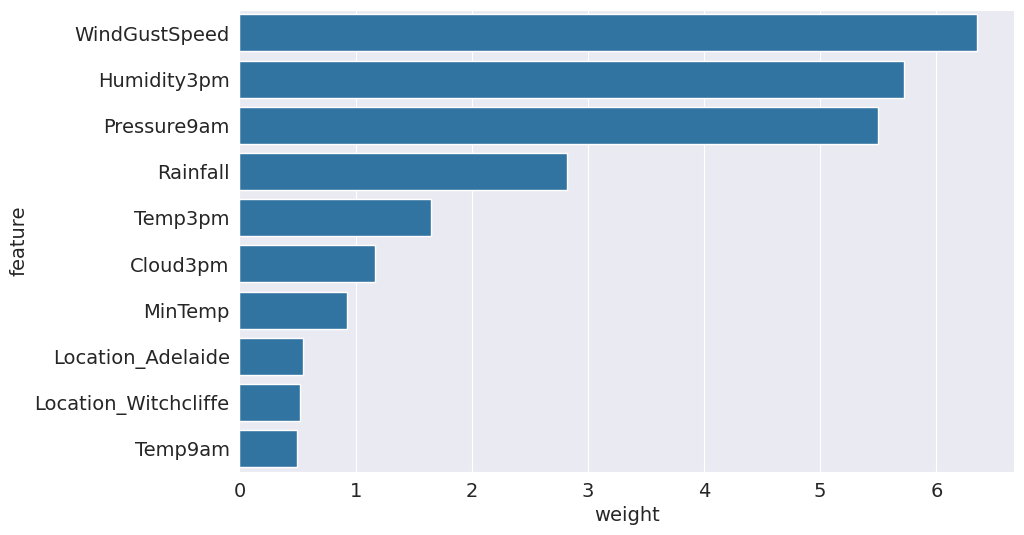

In [ ]:

sns.barplot(data=weight_df.sort_values('weight',ascending=False).head(10),x='weight',y='feature')

**MAking predictions and evaluating the model**

In [ ]:
X_train=train_input[numeric_cols+encoded_categories]
X_val=val_input[numeric_cols+encoded_categories]
X_test=test_input[numeric_cols+encoded_categories]


In [ ]:
train_predict1=model1.predict(X_train)
val_predict1=model1.predict(X_val)
test_predict1=model1.predict(X_test)

## **check accuracy of the model's prediction**

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(train_target,train_predict1)

0.8494546037856914

**We can ouput the probabiltity of the prediction**

In [ ]:
train_probs=model1.predict_proba(X_train)

In [ ]:
train_probs

array([[0.10365323, 0.89634677],
       [0.97743461, 0.02256539],
       [0.90829455, 0.09170545],
       ...,
       [0.95756421, 0.04243579],
       [0.82231946, 0.17768054],
       [0.95733419, 0.04266581]])

In [ ]:
model1.classes_

array(['No', 'Yes'], dtype=object)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(train_target,train_predict1,normalize='true')

array([[0.94843125, 0.05156875],
       [0.50533172, 0.49466828]])

In [ ]:
def predict_and_plot(input,target,name=''):
  prediction=model1.predict(input)
  accuracy=accuracy_score(prediction,target)
  print("Accuracy is {:.2f}%".format(accuracy*100))
  cf=confusion_matrix(target,prediction,normalize='true')
  plt.figure()
  sns.heatmap(cf,annot=True)
  plt.xlabel('Prediction')
  plt.ylabel('Target')
  plt.title('confusion matrix'+' '+name)
  return prediction


Accuracy is 84.95%


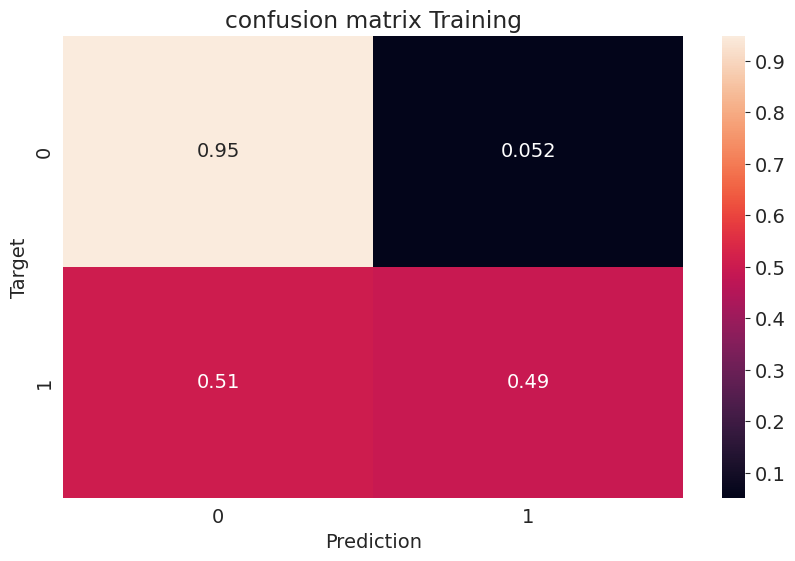

In [ ]:
train_predict1=predict_and_plot(X_train,train_target,'Training')

Accuracy is 84.67%


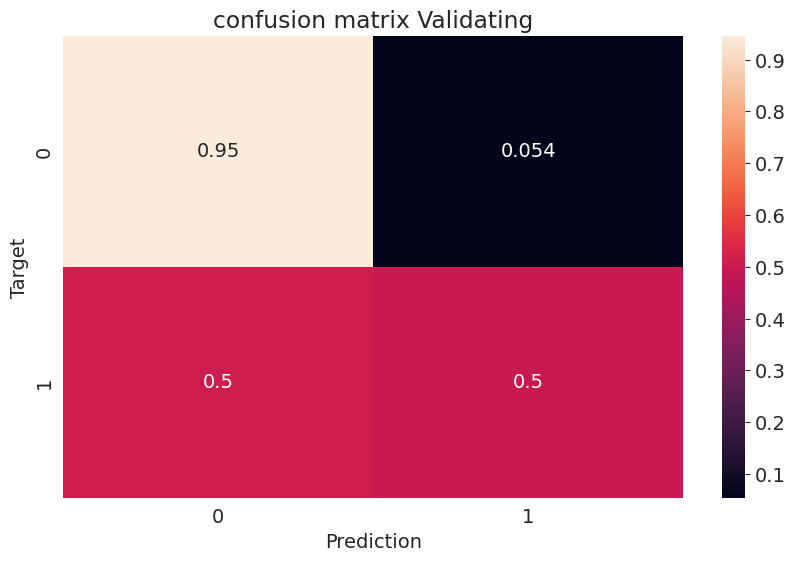

In [ ]:
val_target = val_target.fillna(val_target.mode()[0])
val_predict1=predict_and_plot(X_val,val_target,'Validating')

Accuracy is 84.68%


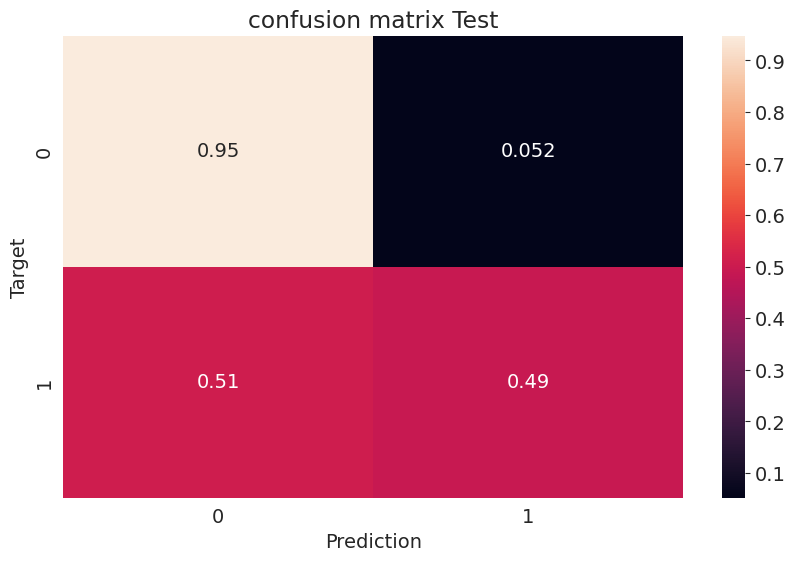

In [ ]:
test_target = test_target.fillna(test_target.mode()[0])
test_predict1=predict_and_plot(X_test,test_target,'Test')

**Check for random or dumb models**

In [ ]:
def random(input):
    return np.random.choice(['No','Yes'],len(input))


def all_no(input):
    return np.full(len(input),'No')


In [ ]:
accuracy_score(val_target,random(input=X_val))

0.4947751959301526

In [ ]:
accuracy_score(val_target,all_no(input=X_val))

0.7793207754709198

## Prediciton on single data

In [ ]:
new_input = {'Date': '2021-06-19',
             'Location': 'Katherine',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

In [ ]:
new_input_df=pd.DataFrame([new_input])
new_input_df

Date   Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  WindGustSpeed WindDir9am  ... WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday
0  2021-06-19  Katherine     23.2     33.2      10.2          4.2       NaN         NNW           52.0         NW  ...         20.0         89.0         58.0       1004.8       1001.5       8.0       5.0     25.7     33.0        Yes

[1 rows x 22 columns]

In [ ]:
new_input_df[numeric_cols]=imputer.transform(new_input_df[numeric_cols])
new_input_df

Date   Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  WindGustSpeed WindDir9am  ... WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday
0  2021-06-19  Katherine     23.2     33.2      10.2          4.2  7.611178         NNW           52.0         NW  ...         20.0         89.0         58.0       1004.8       1001.5       8.0       5.0     25.7     33.0        Yes

[1 rows x 22 columns]

In [ ]:
new_input_df[numeric_cols]=scaler.transform(new_input_df[numeric_cols])
new_input_df

Date   Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  WindGustSpeed WindDir9am  ... WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  RainToday
0  2021-06-19  Katherine  0.747642  0.718336  0.027493     0.028966  0.524909         NNW       0.356589         NW  ...     0.229885         0.89         0.58     0.401653       0.3904  0.888889  0.555556  0.694093  0.737044        Yes

[1 rows x 22 columns]

In [ ]:
new_input_df[encoded_categories]=encoder.transform(new_input_df[categorical_cols].fillna('Unknown'))

<ipython-input-71-da83ad93876b>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_input_df[encoded_categories]=encoder.transform(new_input_df[categorical_cols].fillna('Unknown'))
<ipython-input-71-da83ad93876b>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_input_df[encoded_categories]=encoder.transform(new_input_df[categorical_cols].fillna('Unknown'))
<ipython-input-71-da83ad93876b>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor pe

In [ ]:
new_input_df

Date   Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  WindGustSpeed WindDir9am  ... WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_Unknown  WindDir3pm_W  WindDir3pm_WNW  WindDir3pm_WSW  RainToday_No  RainToday_Unknown  RainToday_Yes
0  2021-06-19  Katherine  0.747642  0.718336  0.027493     0.028966  0.524909         NNW       0.356589         NW  ...            0.0             0.0            0.0                 0.0           0.0             0.0             0.0           0.0                0.0            1.0

[1 rows x 125 columns]

In [ ]:

X_new_input=new_input_df[numeric_cols+encoded_categories]
X_new_input

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  WindDir3pm_SE  WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_Unknown  WindDir3pm_W  WindDir3pm_WNW  WindDir3pm_WSW  RainToday_No  RainToday_Yes
0  0.747642  0.718336  0.027493     0.028966  0.524909       0.356589           0.1      0.229885         0.89         0.58  ...            0.0             0.0             0.0            0.0                 0.0           0.0             0.0             0.0           0.0            1.0

[1 rows x 118 columns]

In [96]:
predict=model1.predict(X_new_input)[0]
predict

'Yes'

In [99]:
prob=model1.predict_proba(X_new_input)[0]
prob

array([0.38688652, 0.61311348])